In [113]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [310]:
df = pd.read_excel('/content/drive/MyDrive/dafemlproject.xlsx')


In [115]:
df.shape

(1198, 8)

In [116]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.0,118.0,4,4.5,4.5,9.65,1,0.92
1,264.0,107.0,4,4.0,4.5,8.87,1,0.76
2,216.0,104.0,3,3.0,3.5,8.00,1,0.72
3,271.0,110.0,3,3.5,2.5,8.67,1,0.80
4,203.0,103.0,2,2.0,3.0,8.21,0,0.65


In [117]:
df.tail()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
1193,264.0,110.0,3,3.5,3.5,9.04,1,0.82
1194,105.0,107.0,3,3.0,3.5,9.11,1,0.84
1195,259.0,116.0,4,5.0,4.5,9.45,1,0.91
1196,202.0,103.0,3,3.5,4.0,8.78,0,0.67
1197,0.0,117.0,4,5.0,4.0,9.66,1,0.95


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1198 entries, 0 to 1197
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          1178 non-null   float64
 1   TOEFL Score        1185 non-null   float64
 2   University Rating  1198 non-null   int64  
 3   SOP                1198 non-null   float64
 4   LOR                1198 non-null   float64
 5   CGPA               1198 non-null   float64
 6   Research           1198 non-null   int64  
 7   Chance of Admit    1198 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 75.0 KB


In [119]:
df.isnull().any()

GRE Score             True
TOEFL Score           True
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

In [120]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,1178.000000,1185.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000
mean,224.246180,107.403376,3.085977,3.398164,3.450751,8.597170,0.546745,0.724023
std,71.747235,6.058219,1.143119,1.005862,0.897455,0.594765,0.498018,0.142385
min,0.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,195.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,236.500000,107.000000,3.000000,3.500000,3.500000,8.600000,1.000000,0.730000
75%,271.000000,112.000000,4.000000,4.000000,4.000000,9.060000,1.000000,0.830000
max,339.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [121]:
x=df.iloc[:,0:7]
x.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.0,118.0,4,4.5,4.5,9.65,1
1,264.0,107.0,4,4.0,4.5,8.87,1
2,216.0,104.0,3,3.0,3.5,8.00,1
3,271.0,110.0,3,3.5,2.5,8.67,1
4,203.0,103.0,2,2.0,3.0,8.21,0


In [122]:
y=df.iloc[:,7:8]
y.head()

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65


In [307]:
df.fillna(df.mean().round(1), inplace=True)
df.isnull().any()

GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

## **OUTLIER DETECTION**

### **BOX PLOT**

Text(0.5, 1.0, 'CGPA')

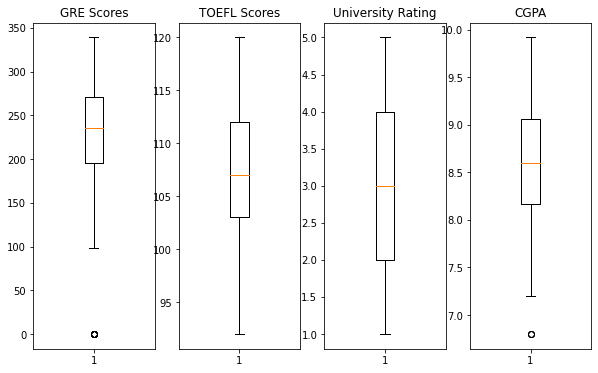

In [124]:
plt.figure(1,figsize=(10,6))
plt.subplot(1,4,1)
fig1 = plt.boxplot(df['GRE Score'])
plt.title("GRE Scores")
plt.subplot(1,4,2)
fig2 = plt.boxplot(df['TOEFL Score'])
plt.title("TOEFL Scores")
plt.subplot(1,4,3)
fig3= plt.boxplot(df['University Rating'])
plt.title('University Rating')
plt.subplot(1,4,4)
fig4= plt.boxplot(df['CGPA'])
plt.title('CGPA')


Above BoX-plot shows the min,median and max values for GRE,TOEFL,University rating and CGPA for the dataset.

### **OUTLIER HANDLING-REMOVING OUTLIERS**

In [125]:
import numpy as np


In [126]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.0,118.0,4,4.5,4.5,9.65,1,0.92
1,264.0,107.0,4,4.0,4.5,8.87,1,0.76
2,216.0,104.0,3,3.0,3.5,8.00,1,0.72
3,271.0,110.0,3,3.5,2.5,8.67,1,0.80
4,203.0,103.0,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
1193,264.0,110.0,3,3.5,3.5,9.04,1,0.82
1194,105.0,107.0,3,3.0,3.5,9.11,1,0.84
1195,259.0,116.0,4,5.0,4.5,9.45,1,0.91
1196,202.0,103.0,3,3.5,4.0,8.78,0,0.67


In [170]:
df['GRE Score'].quantile(0.25)

195.0

In [171]:
df['GRE Score'].quantile(0.75)

271.0

In [172]:
Q1=df['GRE Score'].quantile(0.25)
Q3=df['GRE Score'].quantile(0.75)
IQR=Q3-Q1

In [173]:
IQR

76.0

In [131]:
lower_lim=Q1-1.5*IQR
upper_lim=Q3+1.5*IQR

In [178]:
lower_lim

6.834999999999999

In [179]:
upper_lim

10.395000000000001

In [182]:
low=(df['GRE Score']<lower_lim)
up=(df['GRE Score']>upper_lim)

In [183]:
df=df['GRE Score'][~(low | up)]

In [176]:
df

0       337.0
1       264.0
2       216.0
3       271.0
4       203.0
        ...  
1193    264.0
1194    105.0
1195    259.0
1196    202.0
1197      0.0
Name: GRE Score, Length: 1195, dtype: float64

In [186]:
df['CGPA'].describe()
df['CGPA'].quantile(0.25)
df['CGPA'].quantile(0.75)
Q1=df['CGPA'].quantile(0.25)
Q3=df['CGPA'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
lower_lim=Q1-1.5*IQR
upper_lim=Q3+1.5*IQR
print(lower_lim)
print(upper_lim)
low=(df['CGPA']<lower_lim)
up=(df['CGPA']>upper_lim)
df=df['CGPA'][~(low | up)]
df

8.17
9.06
0.8900000000000006
6.834999999999999
10.395000000000001


0       9.65
1       8.87
2       8.00
3       8.67
4       8.21
        ... 
1193    9.04
1194    9.11
1195    9.45
1196    8.78
1197    9.66
Name: CGPA, Length: 1195, dtype: float64

## **CORRELATION ANALYSIS............**

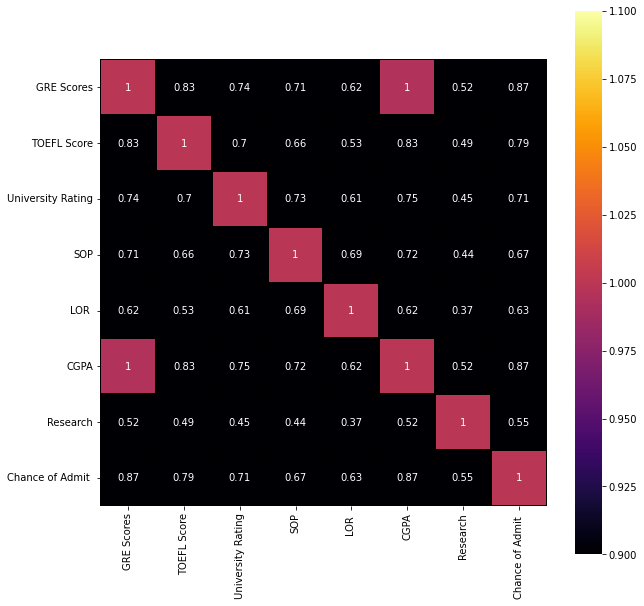

In [309]:
fig5=plt.gcf()
fig5.set_size_inches(10,10)
fig5=sns.heatmap(df.corr(),annot=True,cmap='inferno',linewidths=1,linecolor='k',square=True,mask=False,vmin=1,vmax=1)

Heat map gives a good pictorial representation of the correlation of features to our target value chance of admit to university.we can see that CGPA,GRE,TOEFL,University Ranking has the highest correlation with the chance of admissions to the University.The other parameters like SOP,LOR and Research has less impact on the chance of admission.

### **REMOVING UNWANTED COLUMNS FROM THE DATASET**

In [189]:
df=df.drop(df.columns[[3,4,6]],axis=1)



#              **EXPLORATORY  DATA ANALYSIS**





### **DATA VISUALIZATION**

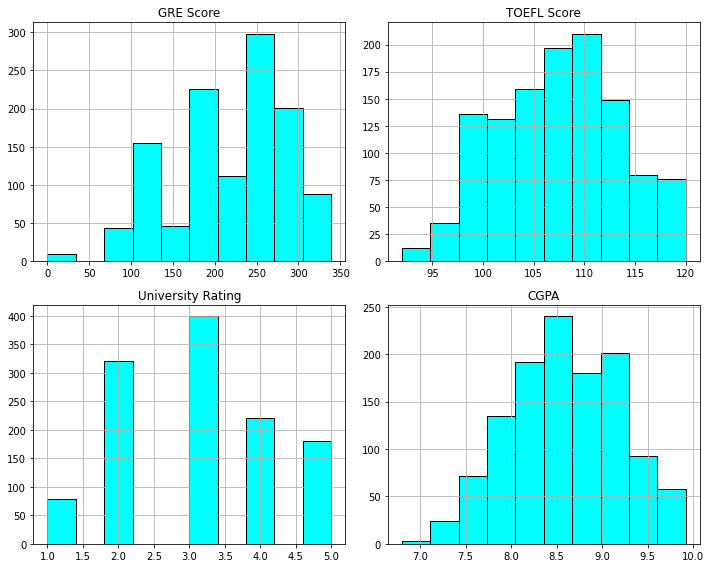

In [144]:
df[['GRE Score','TOEFL Score','University Rating','CGPA']].hist(figsize=(10,8),bins=10,color='cyan',linewidth='1',edgecolor='k')
plt.tight_layout()
plt.show()

We could observe that Most of the students are having the GRE scores in the range of 250-280, the TOEFL scores in the range of  >105 and <113,Most of the students are are from the Universities /colleges  which are rated around 3.5 rating . Most of the students are having the CGPA around 8.5


In [145]:
df_sort=df.sort_values(by=df.columns[-1],ascending=False)
df_sort.head()

,GRE Score,TOEFL Score,University Rating,CGPA,Chance of Admit
24,234.0,119.0,5,9.80,0.97
941,140.0,120.0,4,9.92,0.97
822,180.0,119.0,5,9.80,0.97
423,275.0,119.0,5,9.80,0.97
143,140.0,120.0,4,9.92,0.97


PAIR PLOT-VISUALIZATION

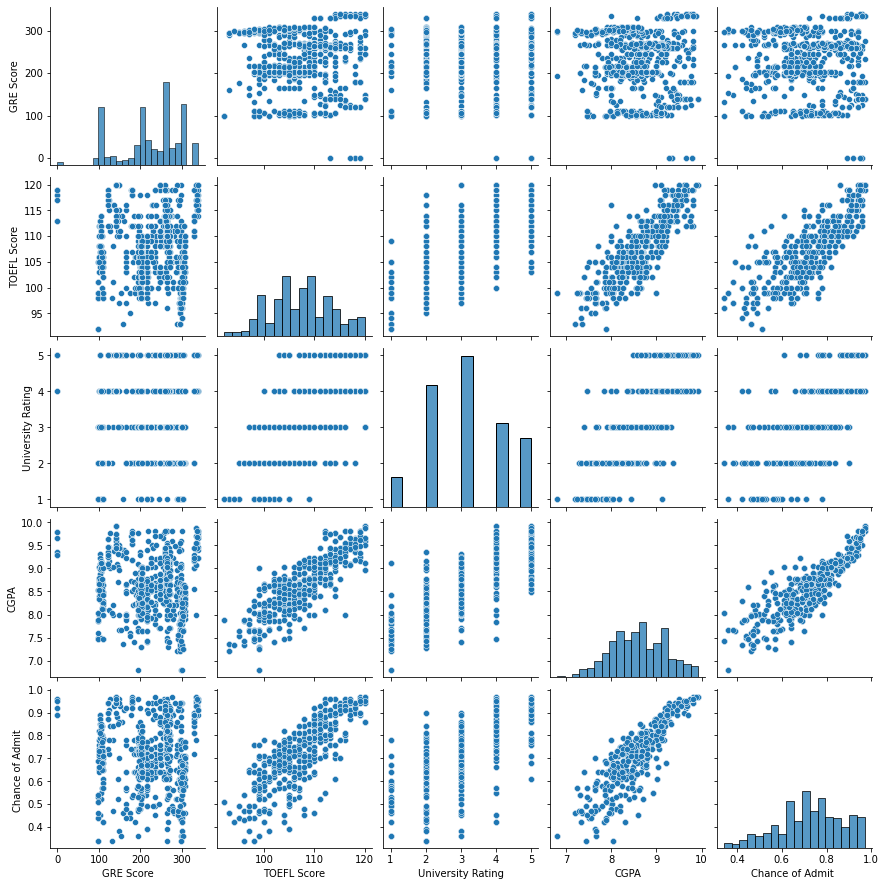

In [146]:
sns.pairplot(data=df)

### **LINE-PLOT-VISUALIZATION**

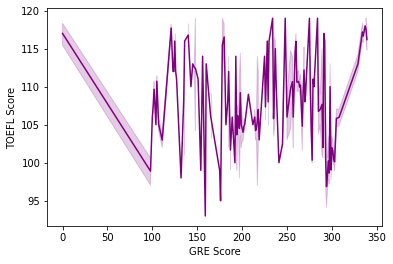

In [147]:
sns.lineplot(x="GRE Score",y="TOEFL Score",data=df,color='purple')

AxesSubplot(0.125,0.125;0.775x0.755)


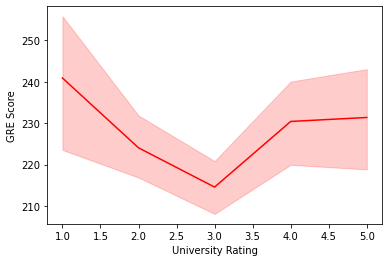

In [38]:
print(sns.lineplot(x="University Rating",y="GRE Score",data=df,color='red'))


AxesSubplot(0.125,0.125;0.775x0.755)


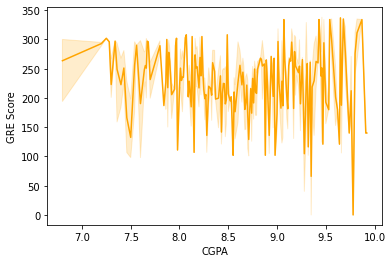

In [39]:
print(sns.lineplot(x="CGPA",y="GRE Score",data=df,color='orange'))

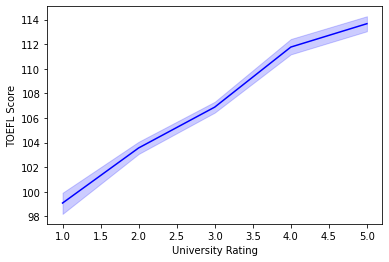

In [40]:
sns.lineplot(x="University Rating",y="TOEFL Score",data=df,color='blue')

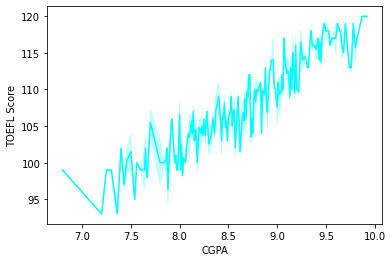

In [41]:
sns.lineplot(x="CGPA",y="TOEFL Score",data=df,color='cyan')

### **SCATTER PLOT-VISUALIZATION**

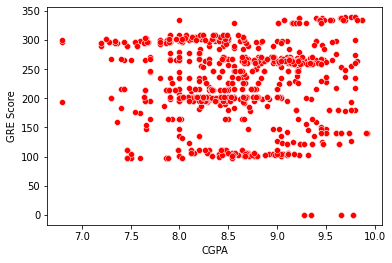

In [42]:
sns.scatterplot(x="CGPA",y="GRE Score",data=df,color='red')

/usr/local/lib/python3.7/dist-packages/seaborn/relational.py:608: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  scout = ax.scatter(scout_x, scout_y, **kws)


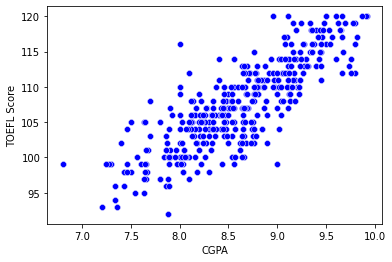

In [43]:
sns.scatterplot(x="CGPA",y="TOEFL Score",data=df,color='B')

### **BAR PLOT VISUALIZATION**

AxesSubplot(0.125,0.125;0.775x0.755)


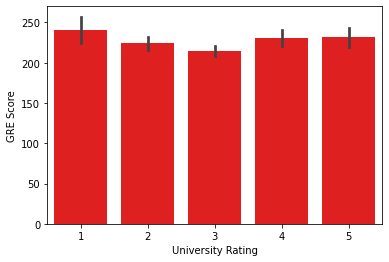

In [80]:
print(sns.barplot(x="University Rating",y="GRE Score",data=df,color='red'))

AxesSubplot(0.125,0.125;0.775x0.755)


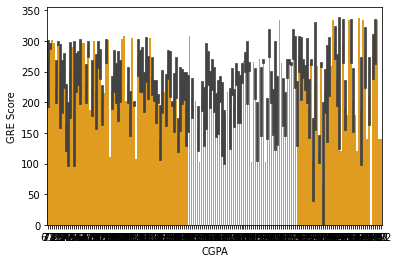

In [81]:
print(sns.barplot(x="CGPA",y="GRE Score",data=df,color='orange'))

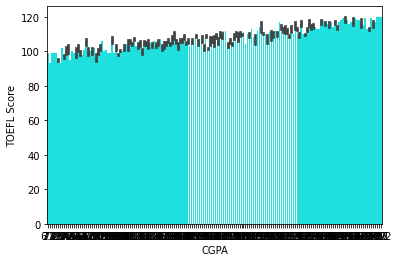

In [82]:
sns.barplot(x="CGPA",y="TOEFL Score",data=df,color='cyan')

In [194]:
df.describe()

,GRE Score,TOEFL Score,University Rating,CGPA,Chance of Admit
count,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000
mean,224.245409,107.403339,3.085977,8.597170,0.724023
std,71.145319,6.025231,1.143119,0.594765,0.142385
min,0.000000,92.000000,1.000000,6.800000,0.340000
25%,195.000000,103.000000,2.000000,8.170000,0.640000
50%,235.000000,107.000000,3.000000,8.600000,0.730000
75%,271.000000,112.000000,4.000000,9.060000,0.830000
max,339.000000,120.000000,5.000000,9.920000,0.970000


In [231]:
x=df.iloc[0:1185,0:-1]
y=df.iloc[0:1185,4:5]

In [168]:
x.tail()


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
1180,264.0,110.0,4,4.5,4.0,9.15,1
1181,300.0,100.0,3,3.0,3.5,8.26,0
1182,140.0,113.0,4,5.0,5.0,9.74,1
1183,335.0,117.0,5,5.0,5.0,9.82,1
1184,302.0,101.0,2,2.5,3.5,7.96,0


In [151]:
y

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65
...,...
1180,0.82
1181,0.62
1182,0.96
1183,0.96


### **DATA MODELLING**

In [240]:
from sklearn.model_selection import train_test_split

In [241]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=15)


### **APPLYING SCALING TECHNIQUES**

In [232]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.transform(x_test)
y_train_scaled=sc.fit_transform(y_train)
y_test_scaled=sc.transform(y_test)

In [156]:
print(x_train_scaled)

[[ 1.15206551 -0.72000406 -0.94253335 -0.38558683]
 [ 0.58929356  0.59481637 -0.06824605  0.40445303]
 [ 1.15206551 -0.72000406 -0.94253335 -0.16706517]
 ...
 [-0.15637927 -0.39129895 -0.06824605 -0.41920555]
 [-1.21157668  0.92352148  0.80604124  1.93410468]
 [-0.14230997 -0.39129895 -0.06824605  0.23635944]]


In [157]:
print(x_test_scaled)

[[ 5.89293561e-01  7.59168922e-01  1.68032854e+00  7.91068282e-01]
 [-1.67586354e+00 -5.55651505e-01 -9.42533351e-01 -2.00683884e-01]
 [ 5.89293561e-01  4.30463815e-01 -6.82460548e-02  4.38071748e-01]
 [ 1.10985761e+00 -8.84356612e-01 -9.42533351e-01 -6.88155288e-01]
 [-1.56379273e-01 -5.55651505e-01 -6.82460548e-02 -4.36014907e-01]
 [-3.39280157e-01 -3.91298951e-01 -9.42533351e-01 -2.34302602e-01]
 [-1.56379273e-01 -6.25938448e-02 -9.42533351e-01 -1.50255808e-01]
 [ 6.31501457e-01  4.30463815e-01 -6.82460548e-02  6.22974694e-01]
 [ 1.44752078e+00  9.23521475e-01  1.68032854e+00  1.44663327e+00]
 [-4.37765248e-01 -6.25938448e-02 -9.42533351e-01 -1.16637091e-01]
 [-1.67586354e+00  4.30463815e-01 -6.82460548e-02  8.75115076e-01]
 [ 5.33016366e-01  1.08787403e+00  1.68032854e+00  8.24686999e-01]
 [ 1.25006702e-01 -5.55651505e-01  1.68032854e+00  4.21262389e-01]
 [ 4.90808469e-01  1.01758709e-01  1.68032854e+00  9.08733793e-01]
 [ 4.90808469e-01  2.66111262e-01 -6.82460548e-02  3.03596878e

In [233]:
print(y_train_scaled)
print(y_train_scaled.shape)

[[-0.15907176]
 [ 0.33031174]
 [-0.43871947]
 [-1.83695804]
 [ 1.51881452]
 [ 0.05066402]
 [ 1.16925487]
 [-1.06792683]
 [ 1.7285503 ]
 [-0.71836719]
 [-0.71836719]
 [ 1.44890259]
 [ 1.09934295]
 [-1.62722225]
 [-0.5086314 ]
 [ 0.81969523]
 [-1.06792683]
 [ 0.95951909]
 [-0.08915983]
 [-0.0192479 ]
 [ 0.26039981]
 [ 0.19048788]
 [-0.43871947]
 [-0.15907176]
 [ 0.12057595]
 [-0.92810297]
 [ 0.81969523]
 [ 0.47013559]
 [ 0.54004752]
 [ 1.09934295]
 [-0.0192479 ]
 [-1.62722225]
 [-0.15907176]
 [ 0.88960716]
 [ 0.95951909]
 [ 1.37899066]
 [ 0.12057595]
 [ 0.88960716]
 [-1.76704611]
 [ 0.74978331]
 [-1.06792683]
 [ 1.7285503 ]
 [ 0.40022366]
 [ 0.54004752]
 [ 0.12057595]
 [-0.29889562]
 [ 0.60995945]
 [ 0.54004752]
 [ 1.51881452]
 [ 0.33031174]
 [-0.9980149 ]
 [-0.43871947]
 [-0.15907176]
 [-1.83695804]
 [ 0.26039981]
 [-1.27766261]
 [ 1.30907873]
 [ 1.51881452]
 [-0.43871947]
 [-1.13783876]
 [ 0.05066402]
 [-1.4873984 ]
 [ 0.88960716]
 [ 0.33031174]
 [-1.97678189]
 [-0.64845526]
 [-0.57854

In [234]:
print(y_test)


      Chance of Admit 
551               0.86
901               0.57
846               0.82
1121              0.62
723               0.67
...                ...
719               0.75
288               0.82
142               0.92
636               0.86
1018              0.76

[237 rows x 1 columns]


In [271]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error as MSE
svm_regression=SVR()
svm_regression.fit(x_train_scaled,y_train_scaled)
yfit=svm_regression.predict(x)
score=svm_regression.score(x,y)
svm_mean=MSE(y,yfit)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVR was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVR was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [272]:
print(svm_mean)

0.4030493879163979


In [304]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
cc=rf.fit(x_train_scaled,y_train_scaled)
from sklearn.metrics import mean_squared_error as MSE
yp=rf.predict(x_test_scaled)
mse_rf=MSE(y_test_scaled,yp)
rms=mse_rf**(1/2)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [305]:
print(rms)

0.32545045223319813


In [212]:
yp

array([ 9.28058723e-01, -7.98066784e-01,  5.12082750e-01, -7.12774232e-01,
       -3.84887289e-01, -5.90977033e-02, -6.75720910e-01,  4.35878748e-01,
        1.25524655e+00,  2.47815661e-01,  5.51233430e-01,  1.15457337e+00,
        7.30358409e-02,  1.01195304e+00,  4.10710454e-01,  9.40094194e-02,
       -1.59086805e+00, -4.00267913e-01, -9.47678310e-01, -4.24037968e-01,
       -4.77870153e-01,  8.05013729e-01,  5.34454567e-01, -1.54877045e-01,
       -6.85508580e-01,  1.17275047e+00, -9.64457173e-01,  5.33056328e-01,
       -4.52002740e-01,  1.25524655e+00, -3.60418114e-01, -2.07955243e+00,
        5.69560974e-02,  4.98100364e-01,  1.56355815e+00,  1.00006801e+00,
        3.95329830e-01,  1.49714182e+00, -6.21888725e-01,  7.42092994e-01,
        9.61067772e-02,  2.99550488e-01,  1.40625631e+00,  1.51392068e+00,
        1.56355815e+00, -1.35666309e+00, -5.47082962e-01, -1.36000824e-01,
        8.10606683e-01,  1.70687760e+00, -1.72370071e+00,  4.98100364e-01,
       -1.85513514e+00, -

### **RESULT**

In [298]:
#Order GRE, TOEFL, University Rating, SOP, LOR, CGPA, Research
print('Chance of getting into university is {}%'.format(round(rf.predict([[0,110, 3, 8.65]])[0]*100, 3)))

Chance of getting into university is 73.96%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [277]:
#Order GRE, TOEFL, University Rating,CGPA
print('Chance of getting into university is {}%'.format(round(rf.predict([[330,0, 4, 8.5]])[0]*100, 3)))

Chance of getting into university is 64.75%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [278]:
#Order GRE, TOEFL, University Rating,CGPA
print('Chance of getting into university is {}%'.format(round(rf.predict([[330,0, 0, 8.5]])[0]*100, 3)))

Chance of getting into university is 64.93%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [302]:
#Order GRE, TOEFL, University Rating,CGPA
print('Chance of getting into university is {}%'.format(round(rf.predict([[290,0, 4, 9.2]])[0]*100, 3)))

Chance of getting into university is 77.73%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
